# AccelerateAI : Dress Styles Clustering

## Clustering: Dress Style

### Problem Statement

You are working as a Data Scientist for an eCommerce giant who deals with apparels business and trying to understand from the dress styles data with them. You have been tasked to segment the dataset based on features provided. 

This dataset contain attributes of dresses and their recommendations according to their sales. 

Please refer to https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/blob/main/07%20Clustering%20Methods/Dress_Style.xlsx for details.

- Price
- Season
- Neckline
- Sleeve Length
- Waist Line
- Material
- Fabric Type
- Decoration
- Pattern type
- Rating in the scale of 1-5


### Solution Approach

In [1]:
import pandas as pd
import numpy as np

# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_excel('./Dress_Style.xlsx')
df.head()

,Price,Season,NeckLine,SleeveLength,waistline,Material,FabricType,Decoration,Pattern Type,Rating
0,Low,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,4.6
1,Low,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0.0
2,High,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0.0
3,Average,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,4.6
4,Low,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,4.5


In [3]:
df.Price.value_counts()

Average      252
Low          129
low           45
Medium        30
very-high     21
high          15
High           6
Name: Price, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         498 non-null    object 
 1   Season        498 non-null    object 
 2   NeckLine      497 non-null    object 
 3   SleeveLength  498 non-null    object 
 4   waistline     413 non-null    object 
 5   Material      372 non-null    object 
 6   FabricType    234 non-null    object 
 7   Decoration    264 non-null    object 
 8   Pattern Type  391 non-null    object 
 9   Rating        500 non-null    float64
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [5]:
df_fill_prev = df.fillna(method='pad')

In [6]:
df_fill_prev.head()

,Price,Season,NeckLine,SleeveLength,waistline,Material,FabricType,Decoration,Pattern Type,Rating
0,Low,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,4.6
1,Low,Summer,o-neck,Petal,natural,microfiber,chiffon,ruffles,animal,0.0
2,High,Automn,o-neck,full,natural,polyster,chiffon,ruffles,print,0.0
3,Average,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,4.6
4,Low,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,4.5


In [7]:
df_replace = df_fill_prev.replace(to_replace=np.nan,value='microfiber')

In [8]:
df_replace.isnull().sum().sum()

0

In [9]:
df_replace.head()

,Price,Season,NeckLine,SleeveLength,waistline,Material,FabricType,Decoration,Pattern Type,Rating
0,Low,Summer,o-neck,sleevless,empire,microfiber,chiffon,ruffles,animal,4.6
1,Low,Summer,o-neck,Petal,natural,microfiber,chiffon,ruffles,animal,0.0
2,High,Automn,o-neck,full,natural,polyster,chiffon,ruffles,print,0.0
3,Average,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,4.6
4,Low,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,4.5


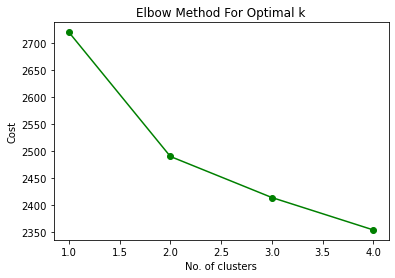

In [10]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=0) # We can set verbose 1 to get details
    kmode.fit_predict(df_replace)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'go-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

We can consider no of clusters as 3

In [11]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=0) # We can set verbose 1 to get details
clusters = kmode.fit_predict(df_replace)

In [12]:
df_replace.insert(0, "Cluster", clusters, True)
df_replace

,Cluster,Price,Season,NeckLine,SleeveLength,waistline,Material,FabricType,Decoration,Pattern Type,Rating
0,1,Low,Summer,o-neck,sleevless,empire,microfiber,chiffon,ruffles,animal,4.6
1,2,Low,Summer,o-neck,Petal,natural,microfiber,chiffon,ruffles,animal,0.0
2,0,High,Automn,o-neck,full,natural,polyster,chiffon,ruffles,print,0.0
3,0,Average,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,4.6
4,1,Low,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,4.5
...,...,...,...,...,...,...,...,...,...,...,...
495,0,Low,Spring,o-neck,full,natural,polyster,chiffon,none,solid,4.7
496,0,Low,Summer,o-neck,full,empire,cotton,chiffon,none,solid,4.3
497,0,Average,Summer,v-neck,full,empire,cotton,chiffon,lace,solid,4.7
498,1,Average,winter,boat-neck,sleevless,empire,silk,broadcloth,applique,print,4.6


In [13]:
df_replace['Cluster'].value_counts()

0    222
2    154
1    124
Name: Cluster, dtype: int64

**Interpretations:**

We have considered 3 clusters here.

When we segment them we can see the distribution across these segments.
- We can filter out based on each cluster label and analyze the property of a particular cluster and which attributes are similar.
- We can do group by and filter based on cluster and certain filters to further analyze.

Some examples illustrated below. However, these are just indications and you can analyze based on any specific business question you are trying to answer as per requirement.

In [14]:
df_pivot_NeckLine = df_replace.pivot_table(index=['Cluster'],columns='NeckLine',aggfunc='size')

df_pivot_NeckLine

NeckLine,Scoop,Sweetheart,backless,boat-neck,bowneck,halter,mandarin-collor,o-neck,open,peterpan-collor,ruffled,slash-neck,sqare-collor,sweetheart,turndowncollor,v-neck
Cluster,,,,,,,,,,,,,,,,
0,NaN,5.0,NaN,11.0,4.0,NaN,NaN,118.0,2.0,2.0,NaN,8.0,2.0,NaN,7.0,63.0
1,2.0,7.0,NaN,2.0,1.0,NaN,NaN,76.0,1.0,1.0,1.0,5.0,NaN,1.0,NaN,27.0
2,NaN,2.0,1.0,6.0,5.0,1.0,1.0,80.0,NaN,3.0,NaN,12.0,3.0,NaN,6.0,34.0


In [15]:
df_replace['NeckLine'].value_counts()

o-neck             274
v-neck             124
slash-neck          25
boat-neck           19
Sweetheart          14
turndowncollor      13
bowneck             10
peterpan-collor      6
sqare-collor         5
open                 3
Scoop                2
backless             1
halter               1
sweetheart           1
ruffled              1
mandarin-collor      1
Name: NeckLine, dtype: int64

In [16]:
df_pivot_Season = df_replace.pivot_table(index=['Cluster'],columns='Season',aggfunc='size')

df_pivot_Season

Season,Automn,Autumn,Spring,Summer,Winter,spring,summer,winter
Cluster,,,,,,,,
0,30.0,3.0,97.0,24.0,41.0,NaN,1.0,26.0
1,13.0,2.0,20.0,29.0,49.0,NaN,NaN,11.0
2,18.0,3.0,6.0,106.0,10.0,2.0,NaN,9.0


In [17]:
df_replace['Season'].value_counts()

Summer    159
Spring    123
Winter    100
Automn     61
winter     46
Autumn      8
spring      2
summer      1
Name: Season, dtype: int64

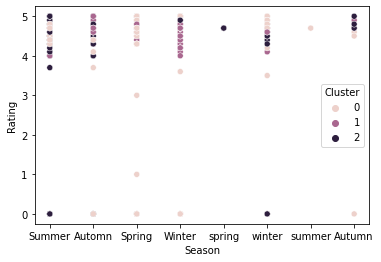

In [18]:
import seaborn as sns

sns.scatterplot(data=df_replace, x="Season", y="Rating", hue="Cluster" )
plt.show()